<a href="https://colab.research.google.com/github/sneha2830/CODSOFT/blob/main/sales_prediction_using_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd
import numpy as py
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [5]:
sales=pd.read_csv("advertising.csv")
sales

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [7]:
sales.shape

(200, 4)

In [8]:
sales.info

<bound method DataFrame.info of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [9]:
sales.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [11]:
sales.tail(10)

,TV,Radio,Newspaper,Sales
190,39.5,41.1,5.8,10.8
191,75.5,10.8,6.0,11.9
192,17.2,4.1,31.6,5.9
193,166.8,42.0,3.6,19.6
194,149.7,35.6,6.0,17.3
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [12]:
sales.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [13]:
sales.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

# handling missing values

In [15]:
sales.isnull().sum()


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [16]:
sales.count()

TV           200
Radio        200
Newspaper    200
Sales        200
dtype: int64

In [18]:
sales.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [20]:
corr_matrix=sales.corr()
corr_matrix

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [21]:
sales['Sales'].value_counts()

11.9    5
16.7    5
20.7    4
11.0    3
11.3    3
       ..
13.4    1
24.2    1
8.1     1
5.5     1
25.5    1
Name: Sales, Length: 121, dtype: int64

# splitting the data

In [26]:
X=sales[['Newspaper', 'TV', 'Radio']]
Y=sales['Sales']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [28]:
print(X.shape, X_train.shape, X_test.shape)

(200, 3) (160, 3) (40, 3)


# data visualization

In [29]:
sns.set(style='whitegrid')

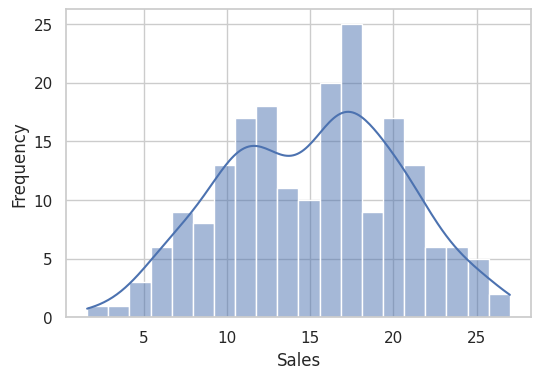

In [31]:
plt.figure(figsize=(6, 4))
sns.histplot(sales['Sales'], bins=20, kde=True)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

<Figure size 600x600 with 0 Axes>

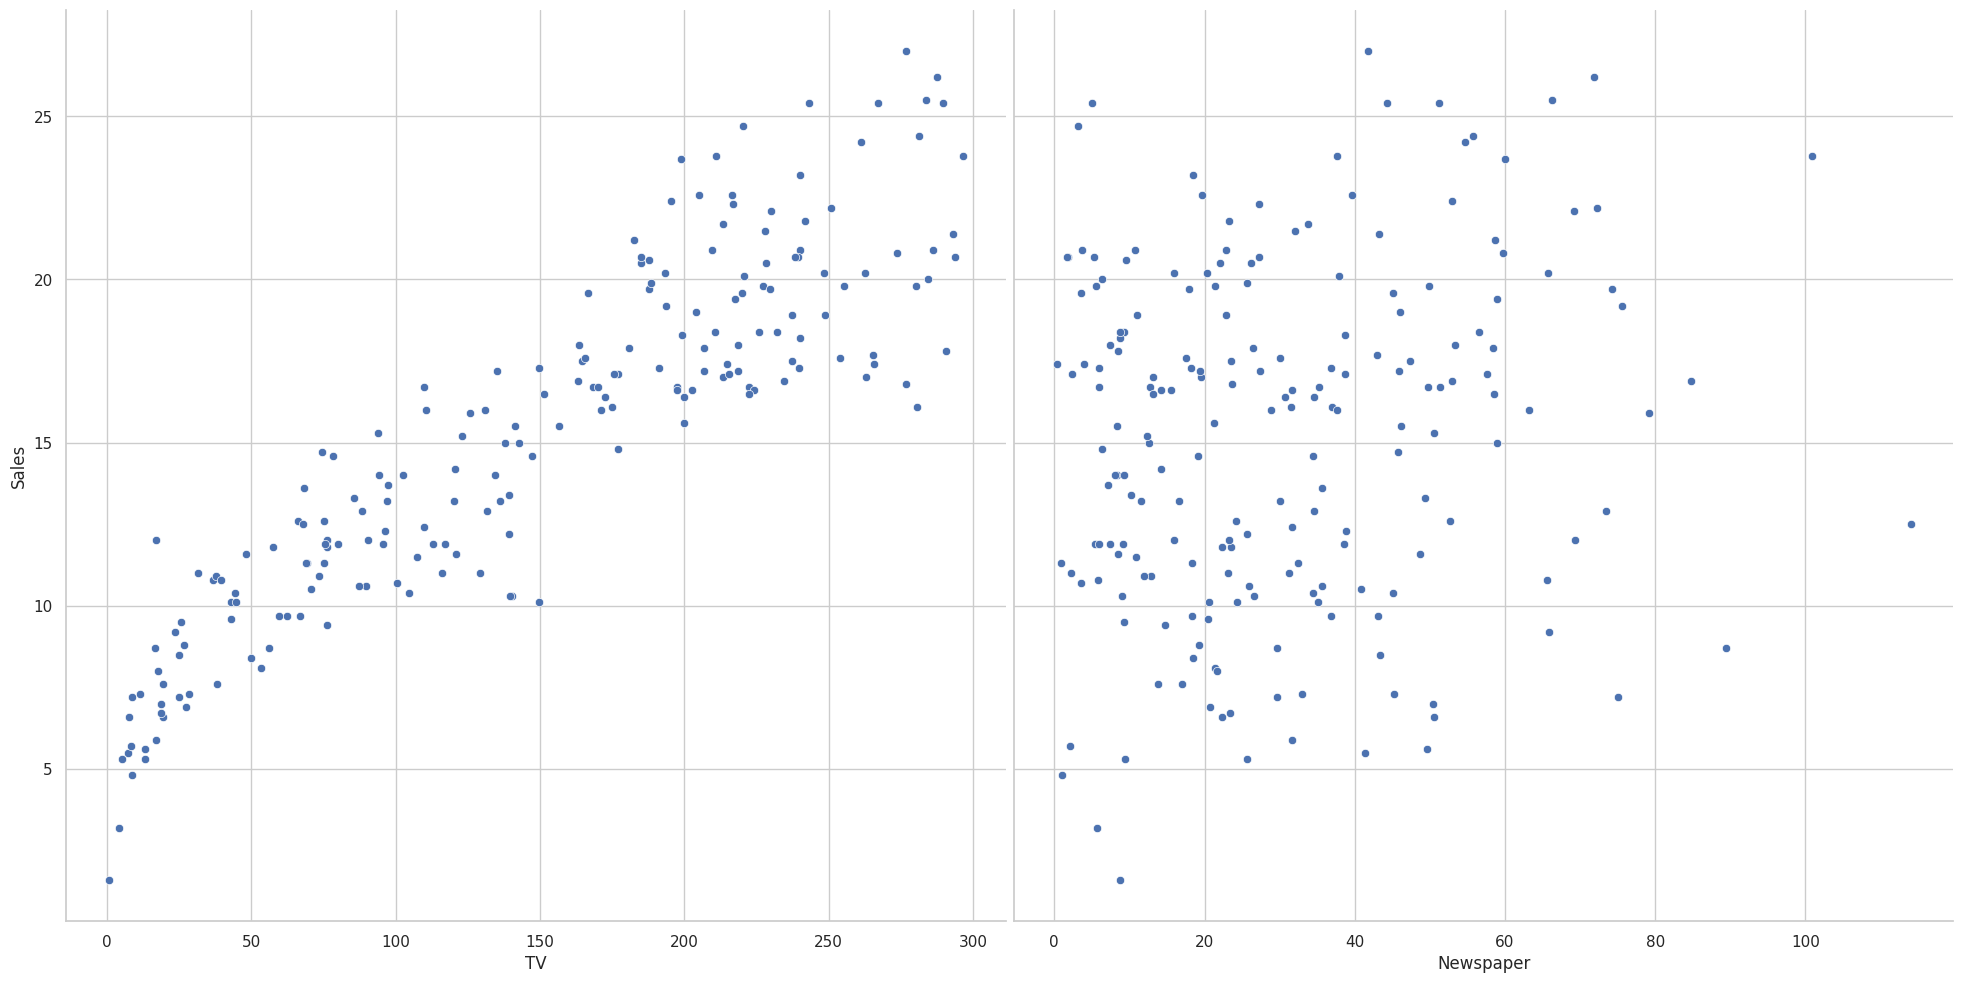

In [34]:
plt.figure(figsize=(6, 6))
sns.pairplot(sales, x_vars=['TV', 'Newspaper'], y_vars='Sales', height=10, aspect=1)
plt.show()

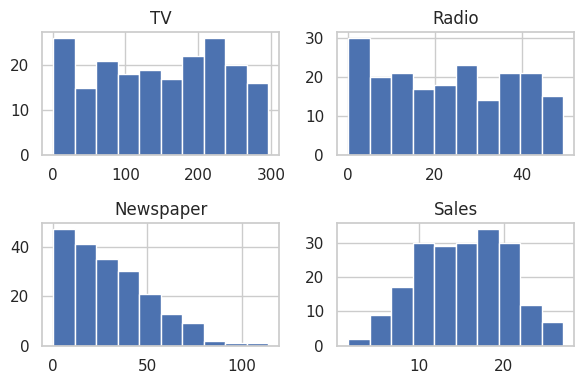

In [35]:
sales.hist(bins=10, figsize=(6, 4))
plt.tight_layout()
plt.show()

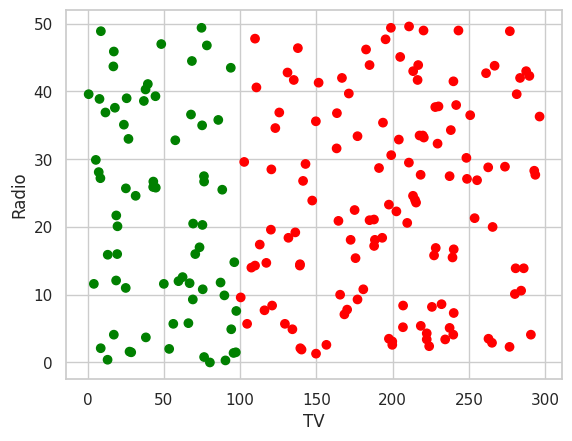

In [38]:
plt.scatter(sales['TV'], sales['Radio'], c=['red' if length>=100 else 'green' for length in sales['TV']])
plt.xlabel('TV')
plt.ylabel("Radio")
plt.show()

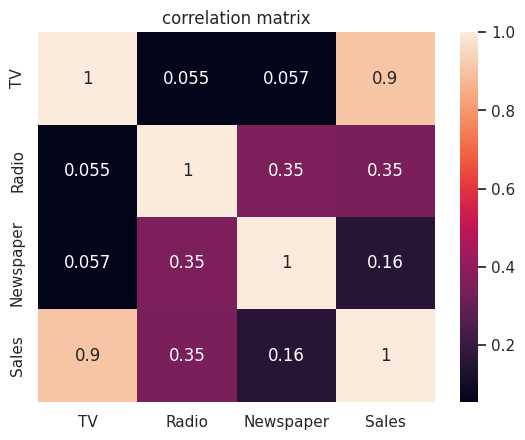

In [39]:
sns.heatmap(corr_matrix, annot=True)
plt.title("correlation matrix")
plt.show()

<Axes: >

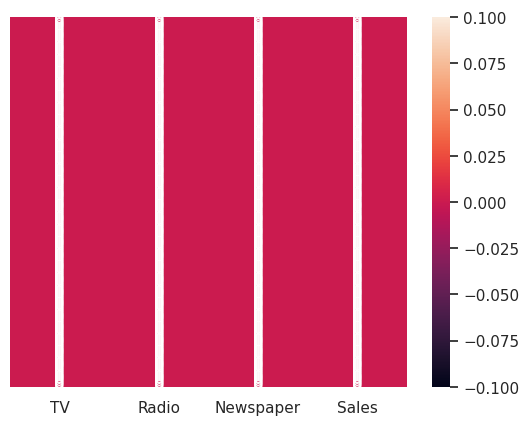

In [40]:
sns.heatmap(sales.isnull(), yticklabels=False, annot=True)

<Axes: xlabel='TV', ylabel='Sales'>

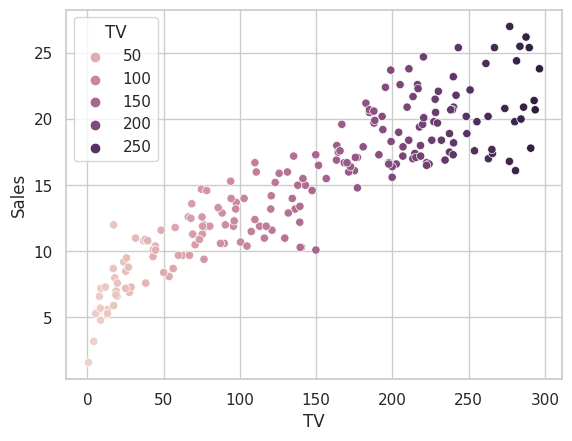

In [43]:
sns.scatterplot(x='TV', y='Sales', hue='TV', data=sales)

<Axes: xlabel='Newspaper', ylabel='Sales'>

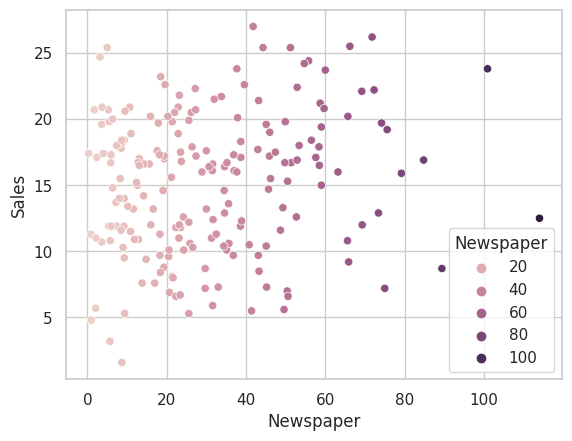

In [45]:
sns.scatterplot(x='Newspaper', y='Sales', hue= 'Newspaper', data=sales)

# training model

In [48]:
#Linear Regression
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [49]:
y_predict= model.predict(X_test)

In [50]:
#evaluation
#mean squared error
mse= mean_squared_error(y_test, y_predict)
mse

2.907756910271091

In [51]:
#root mean squared error
rmse= mean_squared_error(y_test, y_predict, squared=False)
rmse

1.7052146229349228

In [52]:
r2=r2_score(y_test, y_predict)
r2

0.9059011844150826

In [55]:
#XGBRregressor
from xgboost import XGBRegressor
regressor = XGBRegressor()
regressor.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [60]:
#prediction of training data
tdata_predict = regressor.predict(X_train)

In [69]:
#prediction of testing data
rdata_predict = regressor.predict(X_test)

In [70]:
#R- squared value
r2_train = r2_score(y_train, tdata_predict)
r2_train

0.9999998147868797

In [72]:
random = RandomForestRegressor(random_state=42)


In [73]:
random.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [74]:
#predicting on test set
y_predict= random.predict(X_test)


In [75]:
#mean squared error
mse = mean_squared_error(y_test, y_predict)
mse

1.4268856499999998

In [77]:
#root mean squared error
rmse=mean_squared_error(y_test, y_predict, squared=False)
rmse

1.194523189393994

In [78]:
r2 = r2_score(y_test, y_predict)
r2

0.9538241146755293